## COVID-19 GLOBAL DATA ANALYSIS PROJECT

# OBJECTIVES

To analyze the spread, impact, and response to COVID-19 globally by evaluating time-based trends, comparing regional statistics, and visualizing insights using charts and maps.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# load the covid dataset
covid_data = pd.read_csv('covid_data.csv')

## basic data cleanup
covid_data['date'] = pd.to_datetime(covid_data['date'])

# remove aggregates like world, international etc
covid_data = covid_data[covid_data['continent'].notna()]

# relevant columns
cols = [
    'date', 'country', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_vaccinations', 'new_vaccinations', 'population'
]

covid_data = covid_data[cols]
covid_data.fillna(0, inplace=True)
covid_data.head(20)

,date,country,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,new_vaccinations,population
0,2020-01-01,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,40578801.0
1,2020-01-02,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,40578801.0
2,2020-01-03,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,40578801.0
3,2020-01-04,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,40578801.0
4,2020-01-05,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,40578801.0
5,2020-01-06,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,40578801.0
6,2020-01-07,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,40578801.0
7,2020-01-08,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,40578801.0
8,2020-01-09,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,40578801.0
9,2020-01-10,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,40578801.0


## Analyzing COVID-19 impact accross countries

In this case, we try to compare the impact of covid-19 by analyzing the total cases over time, total deaths over time, compare daily new cases between countries and calculate the death rate

## Total Cases over time

We try to visualize the total cases of world wide grouped by date of reporting

## Total Deaths over time
We try to analyze the total deaths world wide grouped by the date of reporting

## Total Vaccinations over time
We try to analyze the total vaccinations world wide grouped by date of reporting


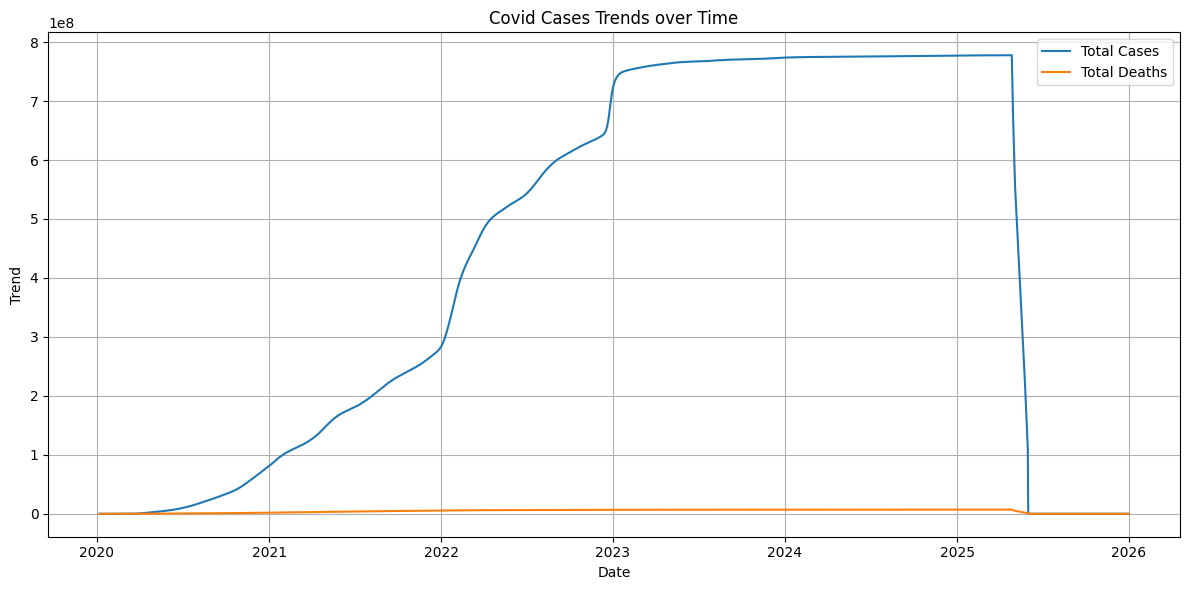

In [8]:
trends = covid_data.groupby('date')[['total_cases', 'total_deaths']].sum().rolling(7).mean()

trends.head()

plt.figure(figsize=(12,6))
plt.plot(trends.index, trends['total_cases'], label='Total Cases')
plt.plot(trends.index, trends['total_deaths'], label='Total Deaths')
plt.title('Covid Cases Trends over Time')
plt.xlabel('Date')
plt.ylabel('Trend')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Daily comparison of new cases between countries

We compare new cases between the following countries: Kenya, United States, India, Brazil, England, South Africa

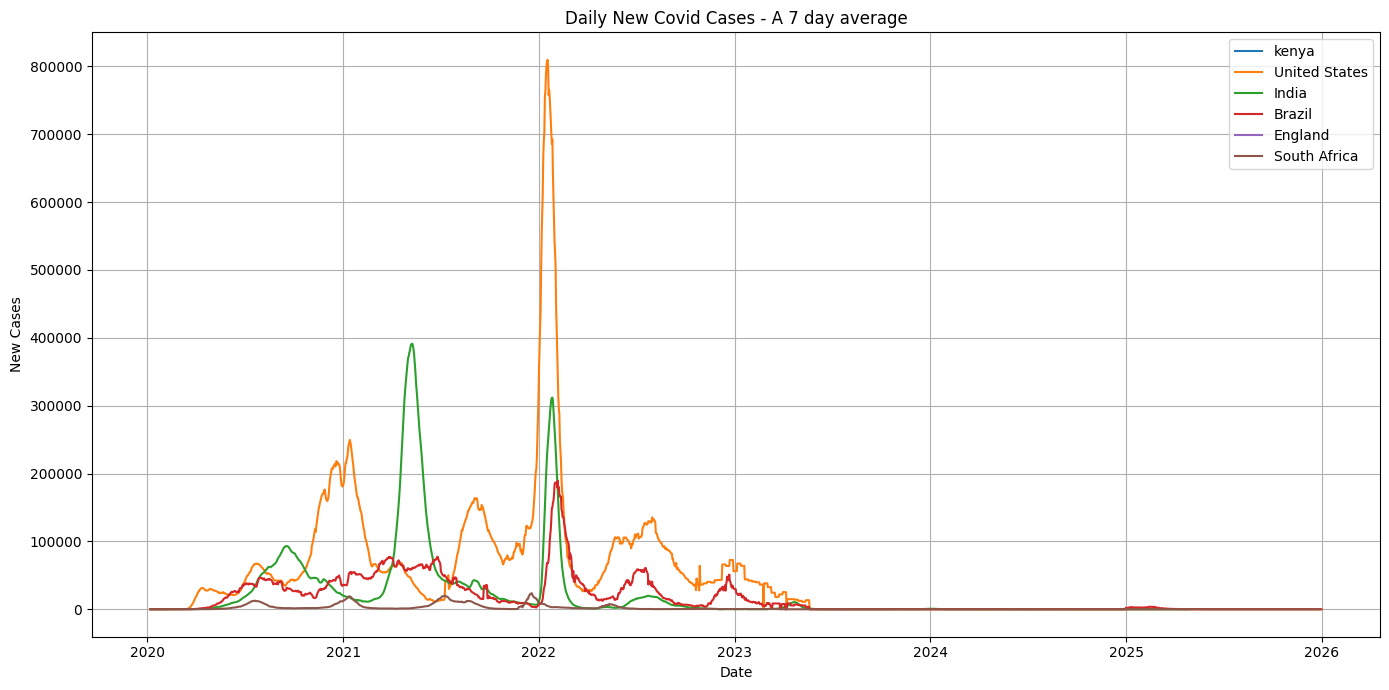

In [9]:
# Countries to compare
countries = ['kenya', 'United States', 'India', 'Brazil', 'England', 'South Africa']

subset = covid_data[covid_data['country'].isin(countries)]

plt.figure(figsize=(14,7))
for country in countries:
    country_df = subset[subset['country'] == country]
    rolling = country_df.set_index('date')['new_cases'].rolling(7).mean()
    plt.plot(rolling, label=country)

plt.title("Daily New Covid Cases - A 7 day average")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Comparing the death rate

We first calculate the death rate by dividing the total deaths by the total cases during the peak date of covid in 2022. We then sort and limit the data to ignore countries with less than 100,000 cases to ignore skewed countries

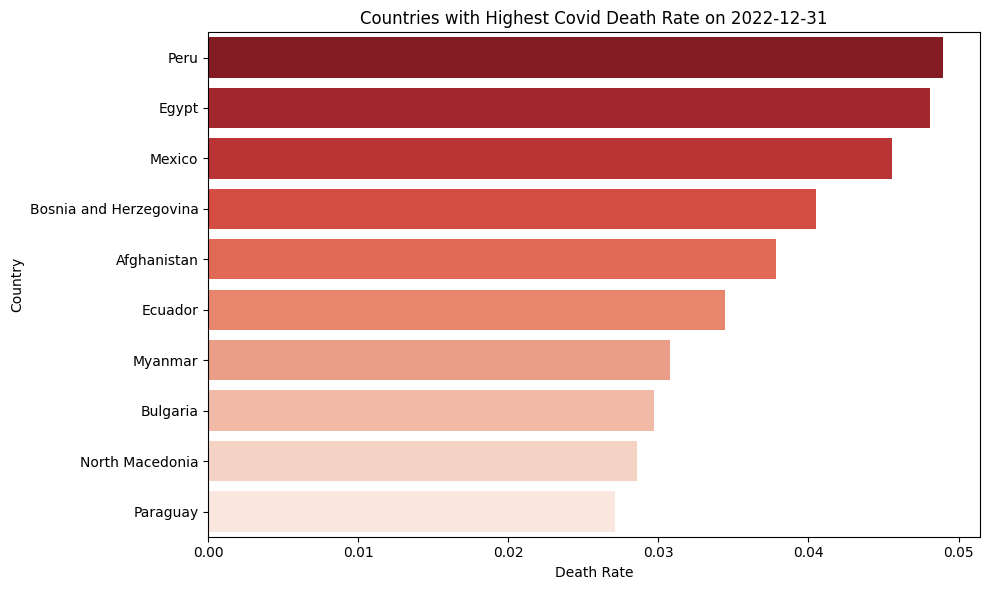

In [10]:
# filter covid data based on 2022
covid_2022 = covid_data[(covid_data['date'] >= "2022-01-01") & (covid_data['date'] <= "2022-12-31")]

#Find peak death cases in 2022
death_2022 = covid_2022.groupby('date')['total_cases'].sum()

# Find the peak date
peak_date = death_2022.idxmax()

# Get data for that peak date
peak_data = covid_data[covid_data['date'] == peak_date].copy()

# Calculate death rate
peak_data['death_rate'] = peak_data['total_deaths'] / peak_data['total_cases']

# Clean and filter
peak_data = peak_data[(peak_data['total_cases'] > 100000) & (peak_data['death_rate'] < 1)]
top_peak_death_rate = peak_data.sort_values('death_rate', ascending=False).head(10)

# plot
plt.figure(figsize=(10,6))
sns.barplot(
    data=top_peak_death_rate,
    x='death_rate',
    y='country',
    hue='country',
    palette='Reds_r',
    legend=False
)
plt.title(f"Countries with Highest Covid Death Rate on {peak_date.date()}")
plt.xlabel("Death Rate")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


## Analysis of vaccination rollouts

Analysis of vaccination rollouts to show cumulative vaccinations over time for the following countries: Kenya, United States, India, Brazil, England, South Africa

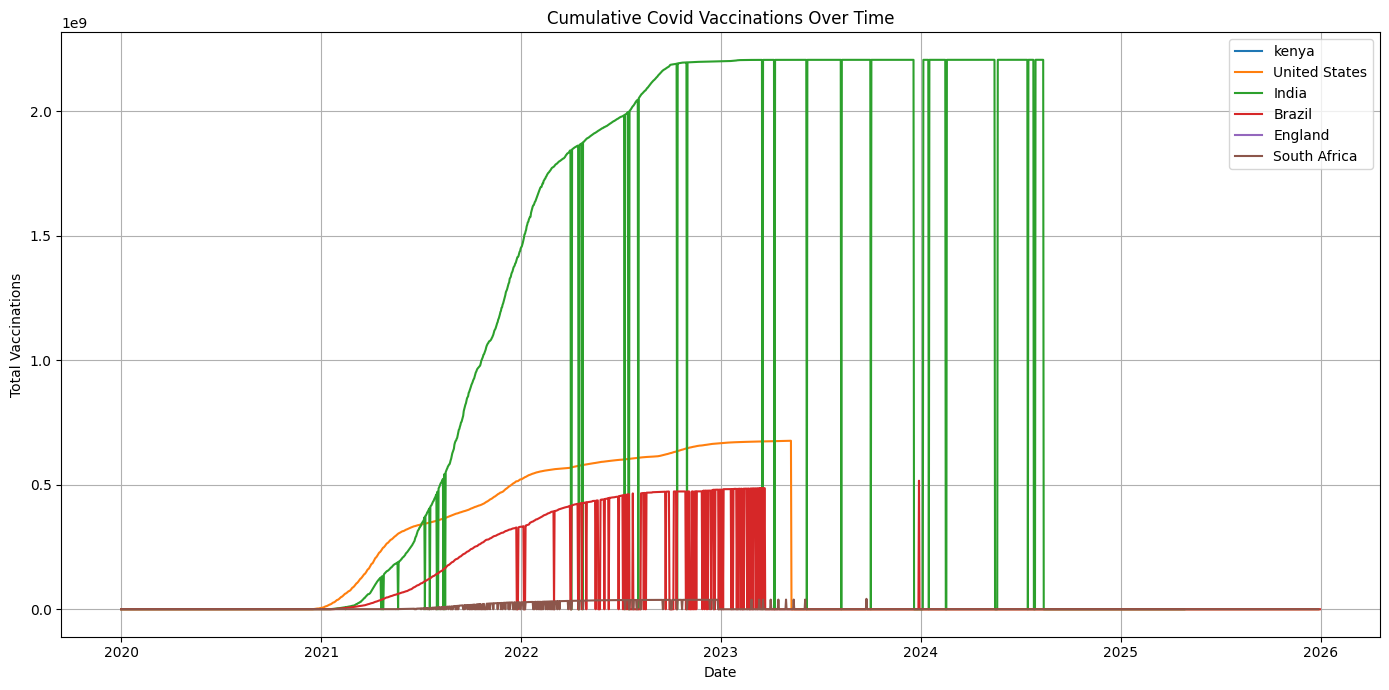

In [11]:
# Countries to compare
countries = ['kenya', 'United States', 'India', 'Brazil', 'England', 'South Africa']

vacc_df = covid_data[covid_data['country'].isin(countries)]

# Plot cumulative vaccinations
plt.figure(figsize=(14,7))
for country in countries:
    country_df = vacc_df[vacc_df['country'] == country]
    plt.plot(country_df['date'], country_df['total_vaccinations'], label=country)

plt.title("Cumulative Covid Vaccinations Over Time")
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# COVID-19 Global Data Analysis Report

**Data Source:** [Our World in Data - COVID-19 Dataset](https://catalog.ourworldindata.org/garden/covid/latest/compact/compact.csv)  
**Tools Used:** `pandas`, `matplotlib`, `seaborn`, `plotly`  
**Time Frame:** 2019–Current

---

## Objectives

- Import and clean COVID-19 global data.
- Analyze trends in total cases, deaths, and vaccinations over time.
- Compare daily new cases between selected countries.
- Calculate and compare death rates by country.
- Analyze and visualize global vaccination rollouts.
- Present findings using clear visualizations and summaries.

---

## 1. Data Preparation

- Dataset imported using Pandas.
- Cleaned by removing global/aggregate entries and handling missing values.
- Converted `date` column to datetime format for time series analysis.

---

## 2. Total Cases, Deaths, and Vaccinations Over Time

- **Line charts** plotted for:
  - Total confirmed cases
  - Total deaths
  - Total vaccinations
  
- Trends show:
  - Rapid growth in cases and deaths in 2020–2021.
  - Vaccinations began in early 2021 and ramped up globally.
  - By 2023, most countries reached a plateau in new cases and vaccinations.

---

## 3. Daily New Cases Comparison

- Compared **daily new COVID-19 cases** across selected countries.
- **Line plots** reveal:
  - Peaks occurred at different times by region.
  - India and the U.S. experienced some of the sharpest spikes.
  - Germany and South Africa showed more consistent wave patterns.

---

## 4. Death Rate Comparison

- **Death Rate** calculated as:  
  `death_rate = total_deaths / total_cases`

- Focused on the **peak pandemic year: 2022**
- **Bar charts** showed:
  - Peru and Egypt had higher estimated death rates.
  - Countries with higher vaccination and healthcare infrastructure had lower death rates.

---

## 5. Vaccination Rollout Analysis

### Cumulative Vaccinations Over Time
- **Line plots** for total vaccinations show:
  - United States and India led in raw numbers.
  - Growth in vaccinations tapered after 2022.

---

## Recommendations

- Compare vaccine rollout vs. case/death reduction.
- Analyze booster coverage across countries.
- Normalize metrics by age groups or population density.
- Create interactive maps of global trends.

---
